In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

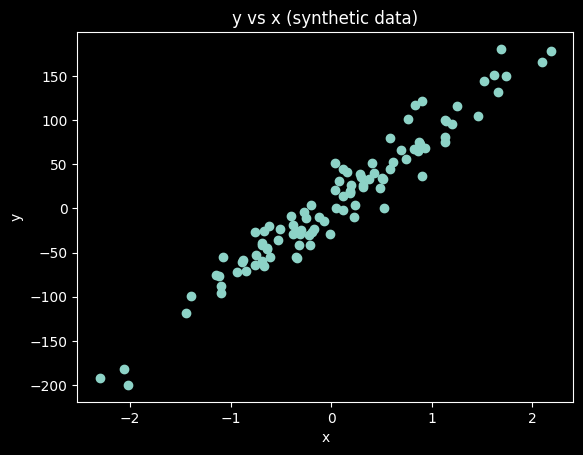

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

plt.scatter(x, y)
plt.title("y vs x (synthetic data)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
def steepest_descent(x: np.ndarray, y: np.ndarray) -> tuple[float, float]:
    """
    Perform steepest descent to find the coefficients of a univariate linear regression model.

    Parameters:
    x (np.ndarray): Input feature.
    y (np.ndarray): Target variable.

    Returns:
    tuple[float, float]: Coefficients (intercept and slope) of the linear regression model.
    """
    # Initialize parameters
    w_0 = 0.0
    w_1 = 0.0

    # Set learning rate
    t = 0.1

    # Set number of iterations
    tau = 100000

    for k in range(tau):
        # Calculate the gradient
        grad_0 = np.mean(w_0 + w_1 * x - y)
        grad_1 = np.mean((w_0 + w_1 * x - y) * x)

        # Update the parameters
        w_0 = w_0 - t * grad_0
        w_1 = w_1 - t * grad_1
    
    return w_0, w_1

In [4]:
w_0, w_1 = steepest_descent(x, y)
print(w_0, w_1)

9.051174996815655 6.371478641858324e-16


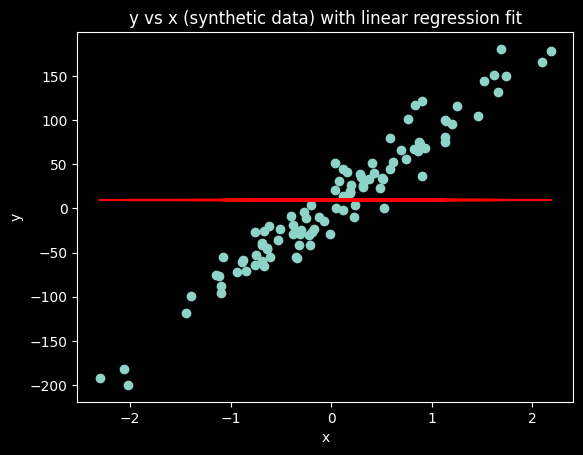

In [5]:
plt.scatter(x, y)
plt.plot(x, w_0 + w_1 * x, color="red")
plt.title("y vs x (synthetic data) with linear regression fit")
plt.xlabel("x")
plt.ylabel("y")
plt.show()